In [69]:
import pandas as pd
from sklearn.metrics import classification_report, f1_score


In [5]:
train = pd.read_json('Dataset/train.jsonl',lines=True)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   uuid               3200 non-null   object
 1   postId             3200 non-null   object
 2   postText           3200 non-null   object
 3   postPlatform       3200 non-null   object
 4   targetParagraphs   3200 non-null   object
 5   targetTitle        3200 non-null   object
 6   targetDescription  2933 non-null   object
 7   targetKeywords     2116 non-null   object
 8   targetMedia        2685 non-null   object
 9   targetUrl          2717 non-null   object
 10  provenance         3200 non-null   object
 11  spoiler            3200 non-null   object
 12  spoilerPositions   3200 non-null   object
 13  tags               3200 non-null   object
dtypes: object(14)
memory usage: 350.1+ KB


In [7]:
train.head()

,uuid,postId,postText,postPlatform,targetParagraphs,targetTitle,targetDescription,targetKeywords,targetMedia,targetUrl,provenance,spoiler,spoilerPositions,tags
0,0af11f6b-c889-4520-9372-66ba25cb7657,532quh,"[Wes Welker Wanted Dinner With Tom Brady, But ...",reddit,[It’ll be just like old times this weekend for...,"Wes Welker Wanted Dinner With Tom Brady, But P...",It'll be just like old times this weekend for ...,"new england patriots, ricky doyle, top stories,","[http://pixel.wp.com/b.gif?v=noscript, http://...",http://nesn.com/2016/09/wes-welker-wanted-dinn...,"{'source': 'anonymized', 'humanSpoiler': 'They...",[how about that morning we go throw?],"[[[3, 151], [3, 186]]]",[passage]
1,b1a1f63d-8853-4a11-89e8-6b2952a393ec,411701128456593408,[NASA sets date for full recovery of ozone hole],Twitter,[2070 is shaping up to be a great year for Mot...,Hole In Ozone Layer Expected To Make Full Reco...,2070 is shaping up to be a great year for Moth...,"ozone layer,ozone hole determined by weather,M...",[http://s.m.huffpost.com/assets/Logo_Huffingto...,http://huff.to/1cH672Z,"{'source': 'anonymized', 'humanSpoiler': '2070...",[2070],"[[[0, 0], [0, 4]]]",[phrase]
2,008b7b19-0445-4e16-8f9e-075b73f80ca4,380537005123190784,[This is what makes employees happy -- and it'...,Twitter,"[Despite common belief, money isn't the key to...",Intellectual Stimulation Trumps Money For Empl...,By: Chad Brooks \r\nPublished: 09/18/2013 06:4...,"employee happiness money,employee happiness in...",[http://i.huffpost.com/gen/1359674/images/o-HA...,http://huff.to/1epfeaw,"{'source': 'anonymized', 'humanSpoiler': 'Inte...",[intellectual stimulation],"[[[1, 186], [1, 210]]]",[phrase]
3,31ecf93c-3e21-4c80-949b-aa549a046b93,844567852531286016,[Passion is overrated — 7 work habits you need...,Twitter,"[It’s common wisdom. Near gospel really, and n...","‘Follow your passion’ is wrong, here are 7 hab...",There's a lot more to work that loving your job,"business, work-life, careers",None,None,"{'source': 'anonymized', 'humanSpoiler': None,...",[Purpose connects us to something bigger and i...,"[[[11, 25], [11, 101]], [[17, 56], [17, 85]], ...",[multi]
4,31b108a3-c828-421a-a4b9-cf651e9ac859,814186311573766144,[The perfect way to cook rice so that it's per...,Twitter,"[Boiling rice may seem simple, but there is a ...",Revealed: The perfect way to cook rice so that...,The question 'How does one cook rice properly?...,"Quora,users,share,perfect,way,cook,rice",None,None,"{'source': 'anonymized', 'humanSpoiler': None,...",[in a rice cooker],"[[[5, 60], [5, 76]]]",[phrase]


In [8]:
train.describe()

,uuid,postId,postText,postPlatform,targetParagraphs,targetTitle,targetDescription,targetKeywords,targetMedia,targetUrl,provenance,spoiler,spoilerPositions,tags
count,3200,3200,3200,3200,3200,3200,2933,2116,2685,2717,3200,3200,3200,3200
unique,3200,3200,3186,3,3184,3168,2813,1795,2663,2716,2632,3147,3057,3
top,0af11f6b-c889-4520-9372-66ba25cb7657,532quh,[10 things you need to know before the opening...,Twitter,[The best movie to watch with someone you’d li...,10 things you need to know before the opening ...,,,"[http://:0, http://unvis.it/img/patreon.png, h...",http://archive.is/uK0Ts,"{'source': 'anonymized', 'humanSpoiler': None,...",[California],"[[[0, 0], [0, 11]]]",[phrase]
freq,1,1,3,1530,2,3,65,230,5,2,513,6,11,1367


In [9]:
test = pd.read_json('Dataset/test.jsonl', lines=True)

In [10]:
test.head()

,postId,postText,postPlatform,targetParagraphs,targetTitle,targetDescription,targetKeywords,targetMedia,targetUrl,id
0,170016066732231_222926014774569,[He Tackles A Nurse At The Hospital. Then You ...,Facebook,"[When you think about your good friends, many ...",Male Nurse Breaks Down When His Friend Reveals...,"When you think about your good friends, many t...",None,[https://cdn0.littlethings.com/app/uploads/201...,http://www.littlethings.com/surprise-gift-kidn...,0
1,828732026186563584,[Why you SHOULD be selfish at work],Twitter,[We're always being encouraged to help others ...,Why you SHOULD be selfish at work: Helping oth...,Wharton School of the University of Pennsylvan...,"Why,selfish,work",None,None,1
2,721323075246112769,[The one strange trick that will make you live...,Twitter,[Meditating inside a beautiful stock-photo roo...,The One Strange Trick That Will Help You Live ...,A new study showed that the wealthy are living...,"culture, news, lgbtq, politics, journalism, vi...",[https://vice-images.vice.com/images/content-i...,http://bit.ly/1SbRoUK,2
3,51a6xo,[Nerd Wins Scrabble Championship With Word You...,reddit,"[Image: Getty, As you probably already know, t...",Nerd Wins Scrabble Championship With Word You’...,"As you probably already know, the World Scrabb...","good vocabularies, scrabble, braconid, Gizmodo","[data:image/gif;base64,R0lGODlhAQABAAAAACH5BAE...",http://archive.is/0z4xs,3
4,54dxh0,[The bizarre new way to eat eggs that has ever...,reddit,[Cured egg yolks are delicious—but strong. Bec...,The Bizarre New Way To Eat Eggs That Has Every...,"Forget frying, poaching, or hard-boiling. Thes...",None,[http://www.rodalesorganiclife.com/sites/rodal...,http://www.rodalesorganiclife.com/food/the-biz...,4


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   postId             400 non-null    object
 1   postText           400 non-null    object
 2   postPlatform       400 non-null    object
 3   targetParagraphs   400 non-null    object
 4   targetTitle        400 non-null    object
 5   targetDescription  363 non-null    object
 6   targetKeywords     241 non-null    object
 7   targetMedia        341 non-null    object
 8   targetUrl          343 non-null    object
 9   id                 400 non-null    int64 
dtypes: int64(1), object(9)
memory usage: 31.4+ KB


In [13]:
print(train['tags'].value_counts())

tags
[phrase]     1367
[passage]    1274
[multi]       559
Name: count, dtype: int64


In [14]:
print("Training Data Columns:")
print(train.info())
print("\nTest Data Columns:")
print(test.info())

Training Data Columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   uuid               3200 non-null   object
 1   postId             3200 non-null   object
 2   postText           3200 non-null   object
 3   postPlatform       3200 non-null   object
 4   targetParagraphs   3200 non-null   object
 5   targetTitle        3200 non-null   object
 6   targetDescription  2933 non-null   object
 7   targetKeywords     2116 non-null   object
 8   targetMedia        2685 non-null   object
 9   targetUrl          2717 non-null   object
 10  provenance         3200 non-null   object
 11  spoiler            3200 non-null   object
 12  spoilerPositions   3200 non-null   object
 13  tags               3200 non-null   object
dtypes: object(14)
memory usage: 350.1+ KB
None

Test Data Columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

In [16]:
print("Missing values in Training Data:")
print(train.isnull().sum())
print("\nMissing values in Test Data:")
print(test.isnull().sum())

Missing values in Training Data:
uuid                    0
postId                  0
postText                0
postPlatform            0
targetParagraphs        0
targetTitle             0
targetDescription     267
targetKeywords       1084
targetMedia           515
targetUrl             483
provenance              0
spoiler                 0
spoilerPositions        0
tags                    0
dtype: int64

Missing values in Test Data:
postId                 0
postText               0
postPlatform           0
targetParagraphs       0
targetTitle            0
targetDescription     37
targetKeywords       159
targetMedia           59
targetUrl             57
id                     0
dtype: int64


In [18]:
for column in train.columns:
    if train[column].dtype == 'object':
        print(f"\nUnique values in {column}:")
        print(train[column].value_counts().head())


Unique values in uuid:
uuid
0af11f6b-c889-4520-9372-66ba25cb7657    1
af2bde19-9fc3-4521-87e0-7311fded2d0e    1
b192d1f5-3cf0-47bd-8eab-1f4214146ed5    1
c31b03d7-0b30-46aa-8401-c8e90de4f554    1
2b523d6a-2d39-413b-bf49-7c8fc419d840    1
Name: count, dtype: int64

Unique values in postId:
postId
532quh                1
51xbuq                1
529xin                1
847312689500102656    1
393437247464148992    1
Name: count, dtype: int64

Unique values in postText:
postText
[10 things you need to know before the opening bell]                                          3
[Gamer figures out how much the full Battlefield 1 game costs and it’s outrageous]            2
[Photo of little girl standing on toilet goes viral for unusual reason]                       2
[Man Crumples To The Ground When He Reads A Special Letter From His Girlfriend’s Daughter]    2
[Daniel Craig Turned Down This Much Money to Play Bond Again]                                 2
Name: count, dtype: int64

Unique value

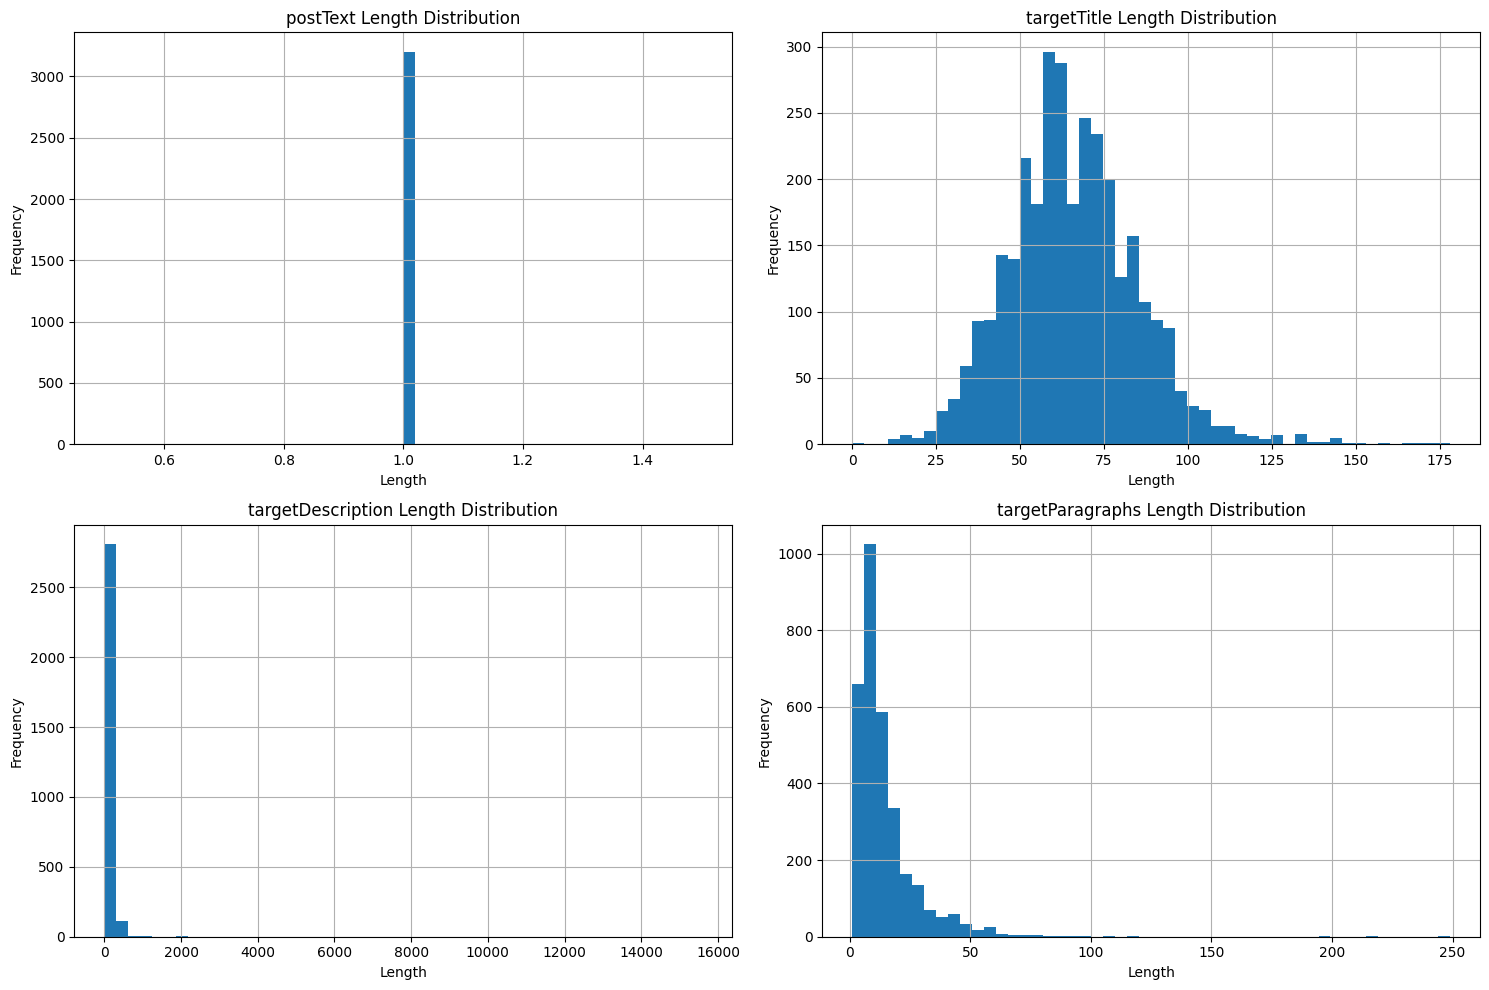

In [19]:
import matplotlib.pyplot as plt

text_columns = ['postText', 'targetTitle', 'targetDescription', 'targetParagraphs']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, column in enumerate(text_columns):
    train[column].str.len().hist(ax=axes[i//2, i%2], bins=50)
    axes[i//2, i%2].set_title(f'{column} Length Distribution')
    axes[i//2, i%2].set_xlabel('Length')
    axes[i//2, i%2].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [23]:
print(train['postText'].head())

0    [Wes Welker Wanted Dinner With Tom Brady, But ...
1     [NASA sets date for full recovery of ozone hole]
2    [This is what makes employees happy -- and it'...
3    [Passion is overrated — 7 work habits you need...
4    [The perfect way to cook rice so that it's per...
Name: postText, dtype: object


In [28]:
print(train['tags'].head())

0    [passage]
1     [phrase]
2     [phrase]
3      [multi]
4     [phrase]
Name: tags, dtype: object


In [30]:
train['tags'] = train['tags'].apply(lambda x: x[0] if isinstance(x, list) else x)


Analysis for postText:

Top words for passage:
reason: 61
believe: 44
just: 44
won: 39
new: 38
really: 37
did: 35
trump: 33
does: 32
happens: 32

Top words for phrase:
new: 85
won: 82
believe: 82
ll: 59
guess: 59
star: 46
just: 43
reveals: 42
world: 39
thing: 36

Top words for multi:
things: 49
make: 26
ll: 25
people: 24
know: 23
new: 20
won: 19
just: 18
believe: 18
best: 16

Analysis for targetTitle:

Top words for passage:
reason: 47
new: 47
trump: 42
believe: 38
won: 37
just: 35
video: 34
really: 31
people: 30
man: 30

Top words for phrase:
new: 66
won: 65
believe: 63
video: 43
ll: 43
guess: 43
world: 39
says: 36
reveals: 35
just: 34

Top words for multi:
things: 42
make: 29
know: 26
people: 24
ll: 20
trump: 18
just: 17
world: 17
won: 17
10: 16

Analysis for targetDescription:

Top words for passage:
new: 106
just: 72
like: 66
year: 65
people: 55
old: 52
years: 46
time: 44
trump: 37
think: 34

Top words for phrase:
new: 127
year: 72
just: 72
time: 59
like: 56
world: 53
people: 52
a

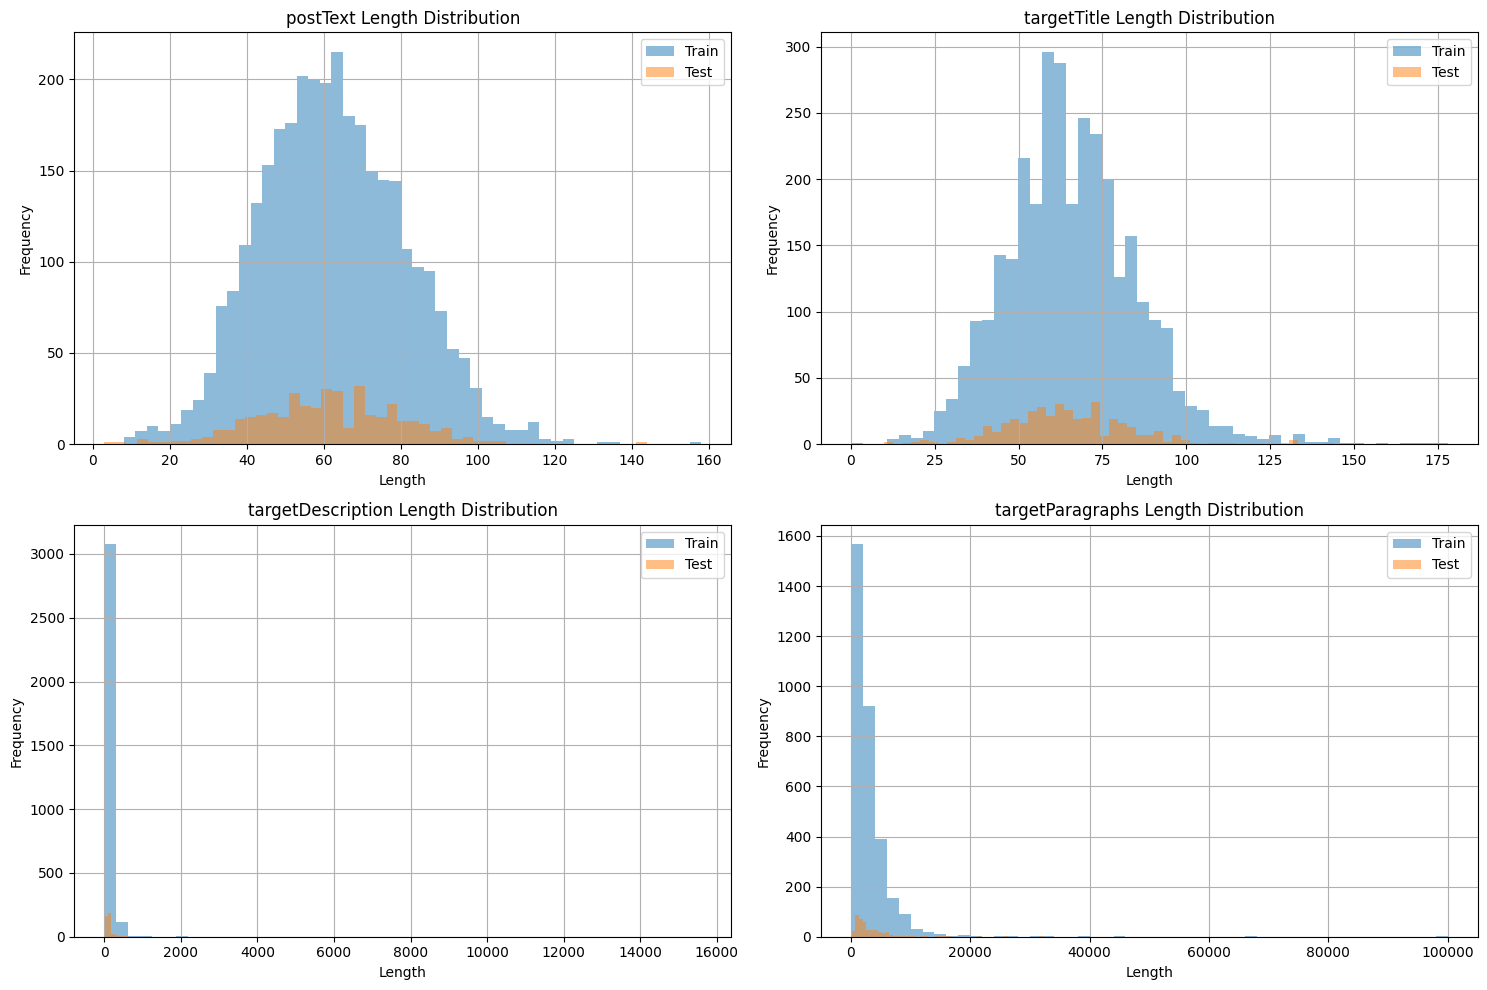

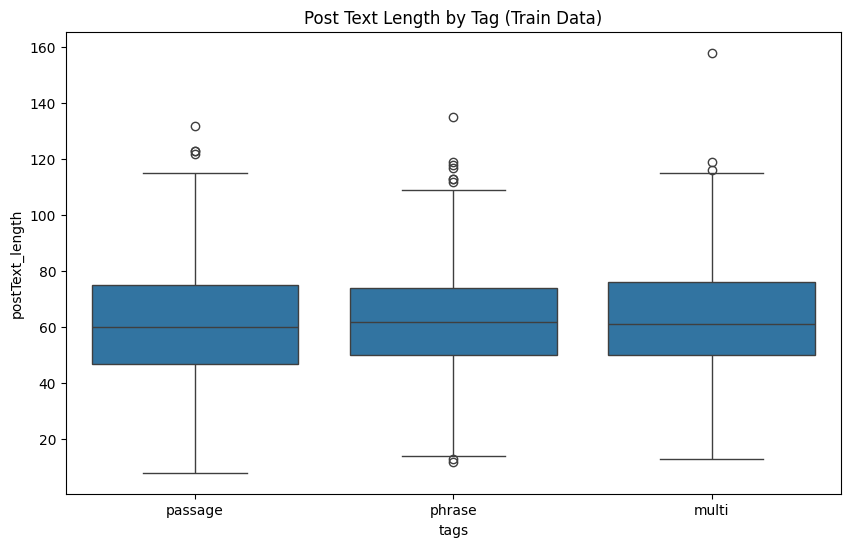


Training Data Shape: (3200, 15)
Test Data Shape: (400, 10)

Training Data Columns: ['uuid', 'postId', 'postText', 'postPlatform', 'targetParagraphs', 'targetTitle', 'targetDescription', 'targetKeywords', 'targetMedia', 'targetUrl', 'provenance', 'spoiler', 'spoilerPositions', 'tags', 'postText_length']
Test Data Columns: ['postId', 'postText', 'postPlatform', 'targetParagraphs', 'targetTitle', 'targetDescription', 'targetKeywords', 'targetMedia', 'targetUrl', 'id']

Unique Tags in Training Data: ['passage' 'phrase' 'multi']

Null values in Training Data:
uuid                    0
postId                  0
postText                0
postPlatform            0
targetParagraphs        0
targetTitle             0
targetDescription       0
targetKeywords       1084
targetMedia           515
targetUrl             483
provenance              0
spoiler                 0
spoilerPositions        0
tags                    0
postText_length         0
dtype: int64

Null values in Test Data:
postId  

In [35]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to handle None values and lists
def preprocess_text_column(column):
    return column.apply(lambda x: ' '.join(x) if isinstance(x, list) else (str(x) if x is not None else ''))

# Preprocess text columns for both train and test datasets
for df in [train, test]:
    for column in ['postText', 'targetTitle', 'targetDescription', 'targetParagraphs']:
        df[column] = preprocess_text_column(df[column])

# Convert 'tags' to strings (only for train dataset as test doesn't have tags)
train['tags'] = train['tags'].apply(lambda x: x[0] if isinstance(x, list) else x)

def top_words_by_class(text_column, label_column, n=10):
    vectorizer = CountVectorizer(stop_words='english')
    
    texts = train[text_column]
    X = vectorizer.fit_transform(texts)
    words = vectorizer.get_feature_names_out()
    
    for label in train[label_column].unique():
        print(f"\nTop words for {label}:")
        X_class = X[train[label_column] == label]
        word_freq = X_class.sum(axis=0).A1
        top_word_indices = word_freq.argsort()[-n:][::-1]
        for idx in top_word_indices:
            print(f"{words[idx]}: {word_freq[idx]}")

# List of text columns to analyze
text_columns = ['postText', 'targetTitle', 'targetDescription', 'targetParagraphs']

for column in text_columns:
    print(f"\nAnalysis for {column}:")
    top_words_by_class(column, 'tags')

# Text length distribution analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, column in enumerate(text_columns):
    train[column].str.len().hist(ax=axes[i//2, i%2], bins=50, alpha=0.5, label='Train')
    test[column].str.len().hist(ax=axes[i//2, i%2], bins=50, alpha=0.5, label='Test')
    axes[i//2, i%2].set_title(f'{column} Length Distribution')
    axes[i//2, i%2].set_xlabel('Length')
    axes[i//2, i%2].set_ylabel('Frequency')
    axes[i//2, i%2].legend()
plt.tight_layout()
plt.show()

# Relationship between text length and tags (only for train dataset)
train['postText_length'] = train['postText'].str.len()
plt.figure(figsize=(10, 6))
sns.boxplot(x='tags', y='postText_length', data=train)
plt.title('Post Text Length by Tag (Train Data)')
plt.show()

# Print some statistics about the datasets
print("\nTraining Data Shape:", train.shape)
print("Test Data Shape:", test.shape)
print("\nTraining Data Columns:", train.columns.tolist())
print("Test Data Columns:", test.columns.tolist())
print("\nUnique Tags in Training Data:", train['tags'].unique())

# Check for any remaining null values
print("\nNull values in Training Data:")
print(train.isnull().sum())
print("\nNull values in Test Data:")
print(test.isnull().sum())

In [38]:
import pandas as pd
from sklearn.impute import SimpleImputer



# Function to handle None values and lists
def preprocess_text_column(column):
    return column.apply(lambda x: ' '.join(x) if isinstance(x, list) else (str(x) if x is not None else ''))

# Preprocess text columns for both train and test datasets
for df in [train, test]:
    for col in ['postText', 'targetTitle', 'targetDescription', 'targetParagraphs']:
        df[col] = preprocess_text_column(df[col])

# Handle missing values
imputer = SimpleImputer(strategy='constant', fill_value='')
for col in ['targetKeywords', 'targetMedia', 'targetUrl']:
    train[col] = imputer.fit_transform(train[[col]]).ravel()
    test[col] = imputer.transform(test[[col]]).ravel()

# Verify that there are no more missing values
print("Missing values in Training Data after imputation:")
print(train.isnull().sum())
print("\nMissing values in Test Data after imputation:")
print(test.isnull().sum())

Missing values in Training Data after imputation:
uuid                    0
postId                  0
postText                0
postPlatform            0
targetParagraphs        0
targetTitle             0
targetDescription       0
targetKeywords       1084
targetMedia           515
targetUrl             483
provenance              0
spoiler                 0
spoilerPositions        0
tags                    0
postText_length         0
dtype: int64

Missing values in Test Data after imputation:
postId                 0
postText               0
postPlatform           0
targetParagraphs       0
targetTitle            0
targetDescription      0
targetKeywords       159
targetMedia           59
targetUrl             57
id                     0
dtype: int64


In [39]:
# Combine text features
train['combined_text'] = train['postText'] + ' ' + train['targetTitle'] + ' ' + train['targetDescription']
test['combined_text'] = test['postText'] + ' ' + test['targetTitle'] + ' ' + test['targetDescription']

# Create length-based features
train['text_length'] = train['combined_text'].str.len()
test['text_length'] = test['combined_text'].str.len()

# Verify the new features
print(train[['combined_text', 'text_length']].head())
print(test[['combined_text', 'text_length']].head())

                                       combined_text  text_length
0  Wes Welker Wanted Dinner With Tom Brady, But P...          415
1  NASA sets date for full recovery of ozone hole...          217
2  This is what makes employees happy -- and it's...          294
3  Passion is overrated — 7 work habits you need ...          168
4  The perfect way to cook rice so that it's perf...          379
                                       combined_text  text_length
0  He Tackles A Nurse At The Hospital. Then You S...          440
1  Why you SHOULD be selfish at work Why you SHOU...          334
2  The one strange trick that will make you live ...          352
3  Nerd Wins Scrabble Championship With Word You’...          347
4  The bizarre new way to eat eggs that has every...          251


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize text
vectorizer = TfidfVectorizer(max_features=5000)
X_train_text = vectorizer.fit_transform(train['combined_text'])
X_test_text = vectorizer.transform(test['combined_text'])

# Convert to DataFrame for easier manipulation
X_train_text_df = pd.DataFrame(X_train_text.toarray(), columns=vectorizer.get_feature_names_out())
X_test_text_df = pd.DataFrame(X_test_text.toarray(), columns=vectorizer.get_feature_names_out())

# Add length-based features
X_train = pd.concat([X_train_text_df, train[['text_length']].reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test_text_df, test[['text_length']].reset_index(drop=True)], axis=1)

# Verify the final feature set
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)

Training features shape: (3200, 5001)
Testing features shape: (400, 5001)


In [41]:
# Handle remaining missing values
for col in ['targetKeywords', 'targetMedia', 'targetUrl']:
    train[col] = train[col].fillna("MISSING")
    test[col] = test[col].fillna("MISSING")

# Create binary features for presence/absence
for col in ['targetKeywords', 'targetMedia', 'targetUrl']:
    train[f'{col}_present'] = (train[col] != "MISSING").astype(int)
    test[f'{col}_present'] = (test[col] != "MISSING").astype(int)

# Add these new features to X_train and X_test
X_train = pd.concat([X_train, train[['targetKeywords_present', 'targetMedia_present', 'targetUrl_present']]], axis=1)
X_test = pd.concat([X_test, test[['targetKeywords_present', 'targetMedia_present', 'targetUrl_present']]], axis=1)

# Prepare the target variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(train['tags'])

# Split the data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y, test_size=0.2, random_state=42)

print("Final training set shape:", X_train.shape)
print("Final validation set shape:", X_val.shape)
print("Final test set shape:", X_test.shape)

Final training set shape: (2560, 5004)
Final validation set shape: (640, 5004)
Final test set shape: (400, 5004)


Validation Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   postId             400 non-null    object
 1   postText           400 non-null    object
 2   postPlatform       400 non-null    object
 3   targetParagraphs   400 non-null    object
 4   targetTitle        400 non-null    object
 5   targetDescription  367 non-null    object
 6   targetKeywords     269 non-null    object
 7   targetMedia        334 non-null    object
 8   targetUrl          340 non-null    object
 9   provenance         400 non-null    object
 10  spoiler            400 non-null    object
 11  spoilerPositions   400 non-null    object
 12  tags               400 non-null    object
 13  id                 400 non-null    int64 
dtypes: int64(1), object(13)
memory usage: 43.9+ KB

Validation Data Head:
                            postId  \
0  80004

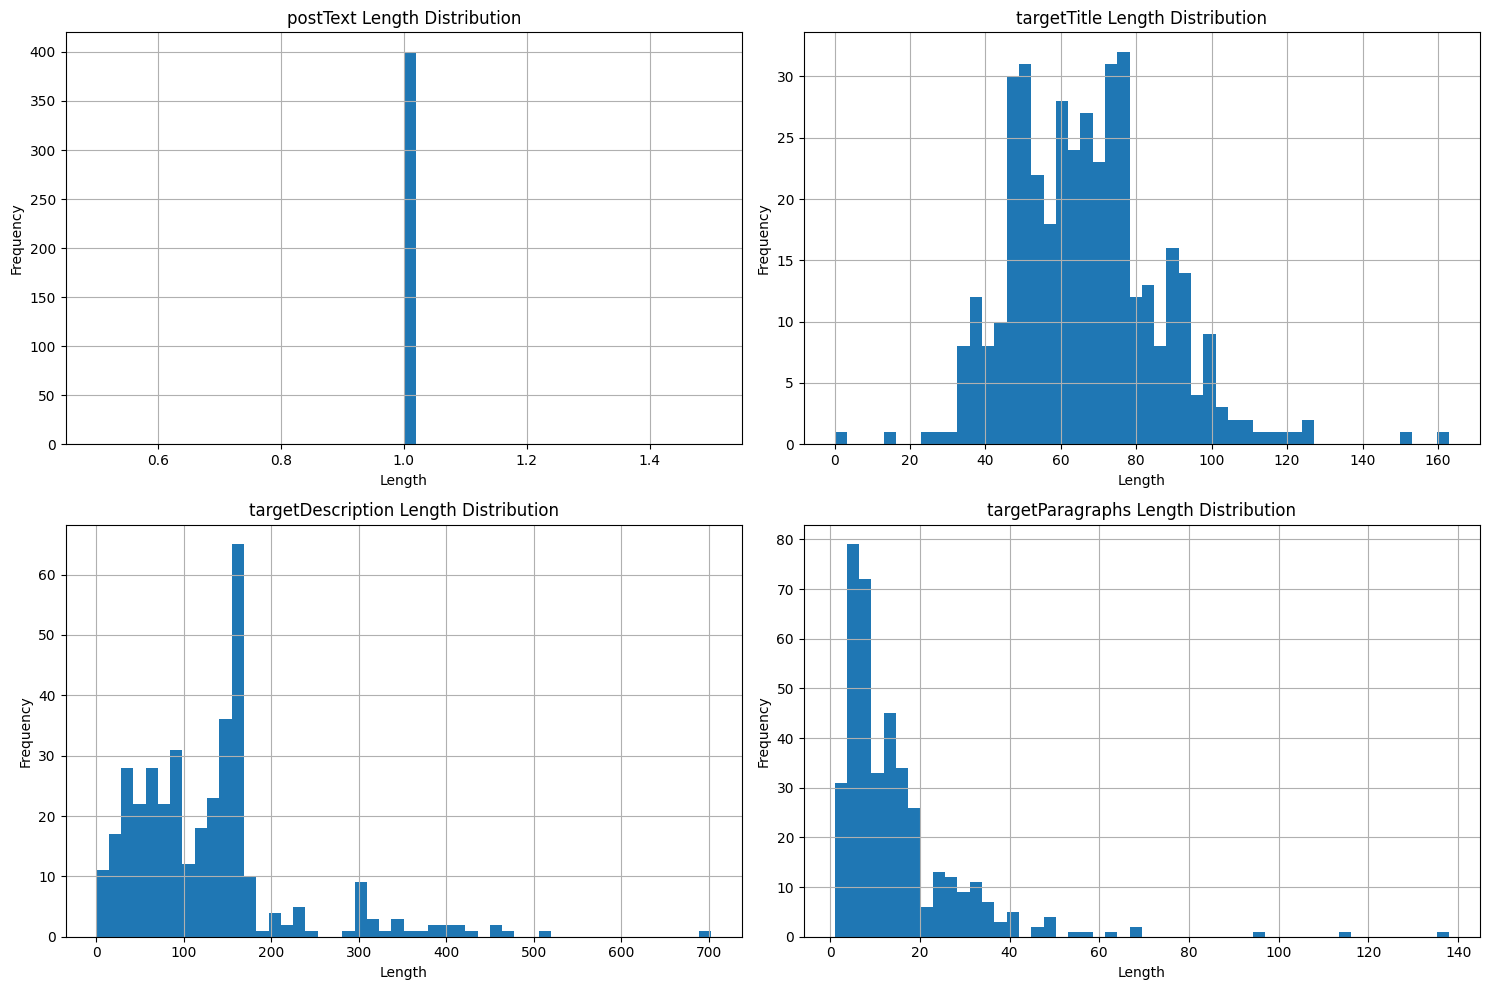


Adding binary features for presence/absence...
Validation features shape: (400, 3956)

Validation Data Sample:
                                       combined_text  text_length  \
0  Five Nights at Freddy’s Sequel Delayed for Wei...          274   
1  Why Arizona Sheriff Joe Arpaio’s fate could ha...          287   
2  Here’s how much you should be tipping your hai...          240   
3  "Harry Potter" alums reunite for new movie Ala...          294   
4  A man swallowed a microSD card and you won't b...          343   

   targetKeywords_present  targetMedia_present  targetUrl_present  
0                       1                    1                  1  
1                       1                    1                  1  
2                       1                    1                  1  
3                       1                    1                  1  
4                       1                    1                  1  


In [88]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Load the Validation Data
val = pd.read_json('Dataset/val.jsonl', lines=True)

# 2. Explore the Validation Data
print("Validation Data Info:")
val.info()
print("\nValidation Data Head:")
print(val.head())

# Check for missing values
print("\nMissing values in Validation Data:")
print(val.isnull().sum())

# Analyze object columns
for column in val.columns:
    if val[column].dtype == 'object':
        print(f"\nUnique values in {column}:")
        print(val[column].value_counts().head())

# 3. Handle Missing Values
print("\nHandling missing values...")
imputer = SimpleImputer(strategy='constant', fill_value='')
for col in ['targetKeywords', 'targetMedia', 'targetUrl']:
    val[col] = imputer.fit_transform(val[[col]]).ravel()

# 4. Analyze Text Lengths
text_columns = ['postText', 'targetTitle', 'targetDescription', 'targetParagraphs']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, column in enumerate(text_columns):
    val[column].str.len().hist(ax=axes[i//2, i%2], bins=50)
    axes[i//2, i%2].set_title(f'{column} Length Distribution')
    axes[i//2, i%2].set_xlabel('Length')
    axes[i//2, i%2].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

# 5. Preprocess and Vectorize Text Data
def preprocess_text_column(column):
    return column.apply(lambda x: ' '.join(x) if isinstance(x, list) else (str(x) if x is not None else ''))

for column in ['postText', 'targetTitle', 'targetDescription', 'targetParagraphs']:
    val[column] = preprocess_text_column(val[column])

# Combine text features
val['combined_text'] = val['postText'] + ' ' + val['targetTitle'] + ' ' + val['targetDescription']

# Vectorize text
vectorizer = TfidfVectorizer(max_features=5000)
X_val_text = vectorizer.fit_transform(val['combined_text'])

# Convert to DataFrame for easier manipulation
X_val_text_df = pd.DataFrame(X_val_text.toarray(), columns=vectorizer.get_feature_names_out())

# Add length-based features
val['text_length'] = val['combined_text'].str.len()
X_val = pd.concat([X_val_text_df, val[['text_length']].reset_index(drop=True)], axis=1)

# 6. Add Binary Features for Presence/Absence
print("\nAdding binary features for presence/absence...")
for col in ['targetKeywords', 'targetMedia', 'targetUrl']:
    val[f'{col}_present'] = (val[col] != "MISSING").astype(int)

# Add these new features to X_val
X_val = pd.concat([X_val, val[['targetKeywords_present', 'targetMedia_present', 'targetUrl_present']]], axis=1)

# Verify the final feature set
print("Validation features shape:", X_val.shape)
print("\nValidation Data Sample:")
print(val[['combined_text', 'text_length', 'targetKeywords_present', 'targetMedia_present', 'targetUrl_present']].head())


In [89]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


# Function to handle None values and lists
def preprocess_text_column(column):
    return column.apply(lambda x: ' '.join(x) if isinstance(x, list) else (str(x) if x is not None else ''))

# Preprocess text columns for train, test, and val datasets
for df in [train, test, val]:
    for column in ['postText', 'targetTitle', 'targetDescription', 'targetParagraphs']:
        df[column] = preprocess_text_column(df[column])

# Handle missing values
imputer = SimpleImputer(strategy='constant', fill_value='')
for col in ['targetKeywords', 'targetMedia', 'targetUrl']:
    train[col] = imputer.fit_transform(train[[col]]).ravel()
    test[col] = imputer.transform(test[[col]]).ravel()
    val[col] = imputer.transform(val[[col]]).ravel()

# Combine text features
for df in [train, test, val]:
    df['combined_text'] = df['postText'] + ' ' + df['targetTitle'] + ' ' + df['targetDescription']
    df['text_length'] = df['combined_text'].str.len()

# Vectorize text
vectorizer = TfidfVectorizer(max_features=5000)
X_train_text = vectorizer.fit_transform(train['combined_text'])
X_test_text = vectorizer.transform(test['combined_text'])
X_val_text = vectorizer.transform(val['combined_text'])

# Convert to DataFrame for easier manipulation
X_train = pd.DataFrame(X_train_text.toarray(), columns=vectorizer.get_feature_names_out())
X_test = pd.DataFrame(X_test_text.toarray(), columns=vectorizer.get_feature_names_out())
X_val = pd.DataFrame(X_val_text.toarray(), columns=vectorizer.get_feature_names_out())

# Add length-based features
X_train['text_length'] = train['text_length']
X_test['text_length'] = test['text_length']
X_val['text_length'] = val['text_length']

# Create binary features for presence/absence
for df, X in zip([train, test, val], [X_train, X_test, X_val]):
    for col in ['targetKeywords', 'targetMedia', 'targetUrl']:
        df[f'{col}_present'] = (df[col] != '').astype(int)
        X[f'{col}_present'] = df[f'{col}_present']

# Ensure 'tags' column is uniformly strings
train['tags'] = train['tags'].apply(lambda x: x[0] if isinstance(x, list) else x)
val['tags'] = val['tags'].apply(lambda x: x[0] if isinstance(x, list) else x)

In [106]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer to get token indices
vectorizer = CountVectorizer()
vectorizer.fit(train['combined_text'])

# Convert text data to sequences of indices
def text_to_indices(texts, vectorizer):
    # Transform texts to token indices
    X = vectorizer.transform(texts)
    # Convert to dense array
    X_dense = X.toarray()
    # Find token indices
    token_indices = np.argmax(X_dense, axis=1)
    return token_indices

# Apply the function
train_indices = text_to_indices(train['combined_text'], vectorizer)
val_indices = text_to_indices(val['combined_text'], vectorizer)
test_indices = text_to_indices(test['combined_text'], vectorizer)

# Convert indices to PyTorch tensors
train_indices = torch.LongTensor(train_indices)
val_indices = torch.LongTensor(val_indices)
test_indices = torch.LongTensor(test_indices)

In [110]:
# Prepare the target variable
le = LabelEncoder()
y_train = le.fit_transform(train['tags'])
y_val = le.transform(val['tags'])

# Compute class weights
class_counts = Counter(y_train)
total_samples = len(y_train)
class_weights = {cls: total_samples/count for cls, count in class_counts.items()}
weights = torch.tensor([class_weights[cls] for cls in range(len(class_weights))], dtype=torch.float).to(device)

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train.values)
X_val_tensor = torch.FloatTensor(X_val.values)
X_test_tensor = torch.FloatTensor(X_test.values)
y_train_tensor = torch.LongTensor(y_train)
y_val_tensor = torch.LongTensor(y_val)

# Reshape the input tensors to 3D (batch_size, sequence_length, input_size)
X_train_tensor = X_train_tensor.unsqueeze(1)
X_val_tensor = X_val_tensor.unsqueeze(1)
X_test_tensor = X_test_tensor.unsqueeze(1)

In [ ]:
y_test = le.transform(test['tags'])

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return torch.tensor(self.texts[idx]), torch.tensor(self.labels[idx])

train_dataset = CustomDataset(train_indices, y_train)
val_dataset = CustomDataset(val_indices, y_val)
test_dataset = CustomDataset(test_indices, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)


In [100]:
# Create DataLoaders
train_dataset = TextDataset(X_train, y_train)
val_dataset = TextDataset(X_val, y_val)
test_dataset = TextDataset(X_test)  # No labels for test set

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [103]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, f1_score
from collections import defaultdict

# Define your LSTM + CNN model here
class LSTM_CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, dropout=0.5):
        super(LSTM_CNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, bidirectional=True, dropout=dropout)
        self.conv1d = nn.Conv1d(in_channels=2 * hidden_dim, out_channels=100, kernel_size=5, padding=2)
        self.fc = nn.Linear(100, output_dim)
        self.dropout = nn.Dropout(dropout)
        self.relu = nn.ReLU()
        self.l2_loss = nn.MSELoss()  # For L2 regularization

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        x = x.permute(0, 2, 1)  # Change shape for CNN
        x = self.conv1d(x)
        x = self.relu(x)
        x = x.mean(dim=2)  # Global average pooling
        x = self.dropout(x)
        x = self.fc(x)
        return x

# Instantiate the model
vocab_size = len(vectorizer.get_feature_names_out())  # Assuming you use TF-IDF features
embedding_dim = 100
hidden_dim = 128
output_dim = len(le.classes_)
model = LSTM_CNN(vocab_size, embedding_dim, hidden_dim, output_dim)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [104]:
# Function to train the model
def train_model(model, train_loader, val_loader, num_epochs=10):
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for features, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        train_losses.append(train_loss / len(train_loader))
        
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for features, labels in val_loader:
                outputs = model(features)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        
        val_losses.append(val_loss / len(val_loader))
        
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")
        
        if val_losses[-1] < best_val_loss:
            best_val_loss = val_losses[-1]
            torch.save(model.state_dict(), 'best_model.pth')
    
    # Plot training vs validation error
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()
    plt.show()


In [ ]:
# Train the model
train_model(model, train_loader, val_loader)

# Load the best model
model.load_state_dict(torch.load('best_model.pth'))

# Function to evaluate the model
def evaluate_model(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for features, labels in data_loader:
            outputs = model(features)
            _, preds = torch.max(outputs, dim=1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())
    
    return all_preds, all_labels

# Evaluate on the training and validation sets
train_preds, train_labels = evaluate_model(model, train_loader)
val_preds, val_labels = evaluate_model(model, val_loader)

# Print classification reports
print("Training Classification Report:")
print(classification_report(train_labels, train_preds, target_names=le.classes_))
print("Validation Classification Report:")
print(classification_report(val_labels, val_preds, target_names=le.classes_))

# Print accuracy scores
print("Training Accuracy:", accuracy_score(train_labels, train_preds))
print("Validation Accuracy:", accuracy_score(val_labels, val_preds))

# Print F1 scores
print("Training F1 Score:", f1_score(train_labels, train_preds, average='weighted'))
print("Validation F1 Score:", f1_score(val_labels, val_preds, average='weighted'))